In [1]:
import pandas as pd

# Load the temperature dataset
df = pd.read_csv("E:/11/practical data sets/temperatures.csv")

# Quick look at the data
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns)
print("\nFirst 5 rows:")
df.head()


Shape of dataset: (117, 18)

Columns: Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')

First 5 rows:


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [2]:
# Select feature and target
X = df[["YEAR"]]   # feature matrix (2D)
y = df["ANNUAL"]   # target vector

# Split into training and testing sets (75% train, 25% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (87, 1)
X_test shape : (30, 1)
y_train shape: (87,)
y_test shape : (30,)


In [3]:
# Import Linear Regression
from sklearn.linear_model import LinearRegression

# Create model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

# Show first few predictions vs actual
import pandas as pd
comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(comparison.head())


    Actual  Predicted
44   28.97  28.974962
4    28.30  28.468597
53   28.92  29.088894
42   28.80  28.949644
10   28.62  28.544552


In [4]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
r2  = metrics.r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE)   : {mse:.4f}")
print(f"Mean Absolute Error (MAE)  : {mae:.4f}")
print(f"R-squared (R²)             : {r2:.4f}")



Model Performance:
Mean Squared Error (MSE)   : 0.1779
Mean Absolute Error (MAE)  : 0.2667
R-squared (R²)             : 0.5821


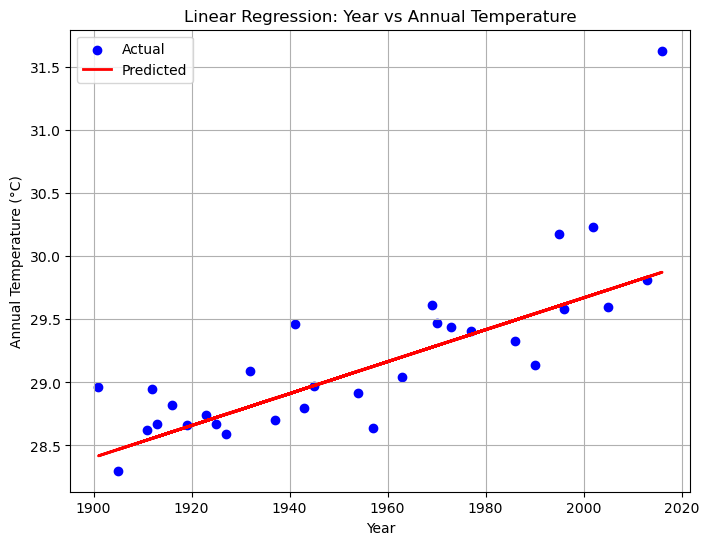

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted")
plt.title("Linear Regression: Year vs Annual Temperature")
plt.xlabel("Year")
plt.ylabel("Annual Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()
